# Objective: The objective of this analysis is to develop a linear regression model to predict brain weight based on various features from the Head Brain dataset.

# Q1: Load the data from the HeadBrain.CSV file and perform initial exploratory data analysis (EDA).

**import Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset using pandas.read_csv().**



In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/headbrain/headbrain.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [4]:
# Check for missing values
print(df.isnull().sum())

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64


In [5]:
# Display summary statistics
print(df.describe())

           Gender   Age Range  Head Size(cm^3)  Brain Weight(grams)
count  237.000000  237.000000       237.000000           237.000000
mean     1.434599    1.535865      3633.991561          1282.873418
std      0.496753    0.499768       365.261422           120.340446
min      1.000000    1.000000      2720.000000           955.000000
25%      1.000000    1.000000      3389.000000          1207.000000
50%      1.000000    2.000000      3614.000000          1280.000000
75%      2.000000    2.000000      3876.000000          1350.000000
max      2.000000    2.000000      4747.000000          1635.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


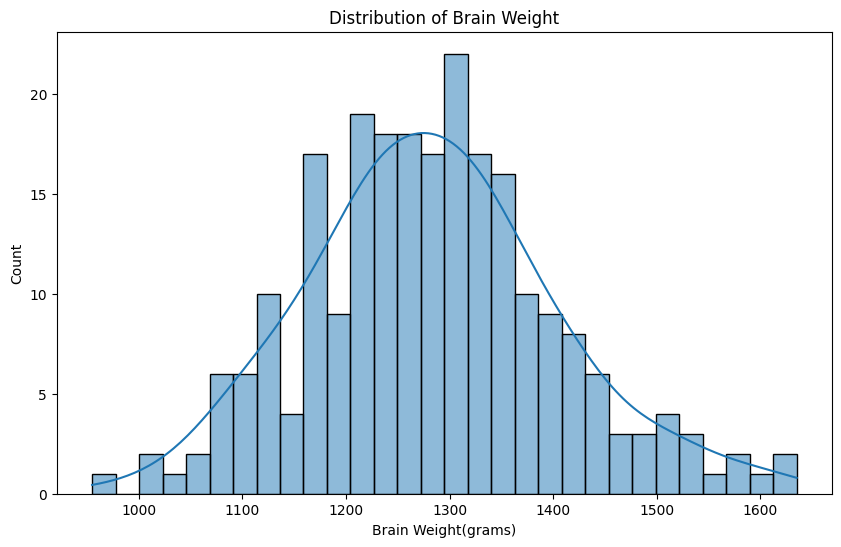

In [6]:
# Visualize the distribution of the target variable (Brain Weight)
plt.figure(figsize=(10, 6))
sns.histplot(df['Brain Weight(grams)'], bins=30, kde=True)
plt.title('Distribution of Brain Weight')
plt.show()

# Q2: Analyze and visualize the correlation between the features and the target variable (brain weight).

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

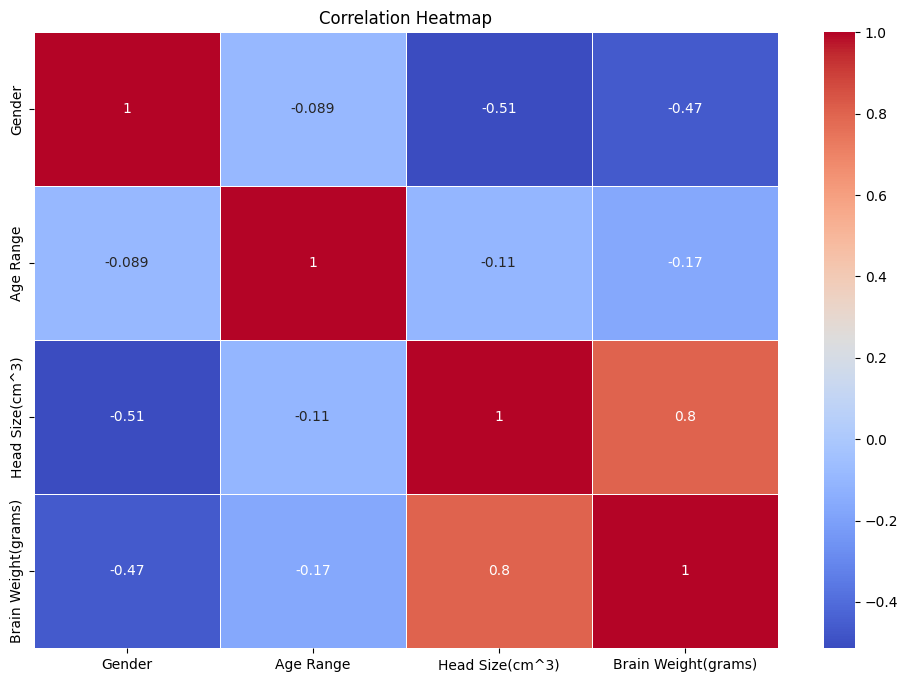

In [8]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Identify and list the features that have the highest positive and negative correlation with the target variable.**

In [9]:
# Find the highest positive and negative correlations with the target variable (Brain Weight)
correlation_brain_weight = correlation_matrix['Brain Weight(grams)'].sort_values(ascending=False)
print("Features with highest positive correlation:\n", correlation_brain_weight.head(3))
print("Features with highest negative correlation:\n", correlation_brain_weight.tail(3))

Features with highest positive correlation:
 Brain Weight(grams)    1.000000
Head Size(cm^3)        0.799570
Age Range             -0.169438
Name: Brain Weight(grams), dtype: float64
Features with highest negative correlation:
 Head Size(cm^3)    0.799570
Age Range         -0.169438
Gender            -0.465266
Name: Brain Weight(grams), dtype: float64


# Q3: Prepare the data for training the Multiple Linear Regression model.

In [10]:
# Select the features (X) and the target variable (y)
X = df.drop('Brain Weight(grams)', axis=1)
y = df['Brain Weight(grams)']

**Split the dataset into training and testing sets using train_test_split from sklearn.model_selection.**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Q4: Train a Multiple Linear Regression model using the training data.

**Import the LinearRegression class from sklearn.linear_model.**

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Display the model's coefficients and intercept.**

In [16]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ -7.18012209 -11.79928219  87.6224021 ]
Intercept: 1281.3227513227514


# Q5: Evaluate the performance of the Multiple Linear Regression model using the testing data.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Predict the brain weights using the testing data.**

In [18]:
# Predict brain weights using the testing data
y_pred = model.predict(X_test)

**Calculate and display the performance metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) using mean_absolute_error and mean_squared_error from sklearn.metrics.**

In [19]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 54.08968544229677
Mean Squared Error (MSE): 4349.999457297087
Root Mean Squared Error (RMSE): 65.9545256771443


**Plot the predicted vs actual brain weights.**

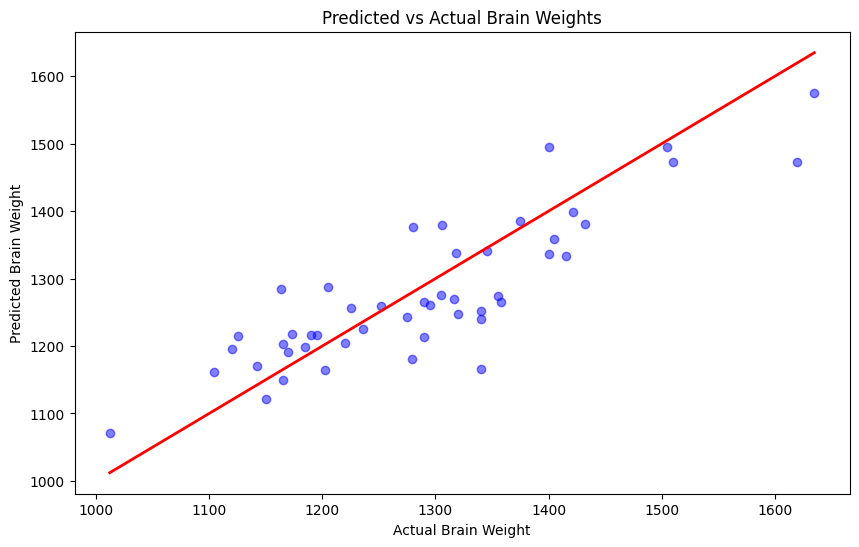

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predicted vs Actual Brain Weights')
plt.xlabel('Actual Brain Weight')
plt.ylabel('Predicted Brain Weight')
plt.show()